### Import modules# 

In [1]:
import csv
import pandas as pd
import datetime
import ipaddress
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

### Read in the csv and add headers to the columns

In [27]:
df = pd.read_csv('../data/new_data.csv',
                 names = ['IP_Address', 'Subnet_mask', 'In_use?', 'unix_timestamp'])

### Combine IP_Address and Subnet_mask columns to create IP_Network column

In [3]:
df['IP_Network'] = df['IP_Address'] + '/' + df['Subnet_mask'].map(str)
df

,IP_Address,Subnet_mask,In_use?,unix_timestamp,IP_Network
0,10.128.0.0,22,0,1525670182,10.128.0.0/22
1,10.128.4.0,22,0,1525670192,10.128.4.0/22
2,10.128.8.0,22,0,1525670202,10.128.8.0/22
3,10.128.12.0,22,0,1525670212,10.128.12.0/22
4,10.128.16.0,22,0,1525670222,10.128.16.0/22
5,10.128.128.0,24,0,1525670222,10.128.128.0/24
6,10.128.129.0,24,0,1525670222,10.128.129.0/24
7,10.128.130.0,24,0,1525670222,10.128.130.0/24
8,10.128.131.0,24,0,1525670222,10.128.131.0/24
9,10.128.132.0,22,0,1525670222,10.128.132.0/22


### Convert IP_Address column to ipaddress.ip_address object and IP_Network column to ipaddress.ip_network object

In [4]:
df['IP_Address'] = df['IP_Address'].apply(ipaddress.ip_address)
df['IP_Network'] = df['IP_Network'].apply(ipaddress.ip_network)

In [5]:
df

,IP_Address,Subnet_mask,In_use?,unix_timestamp,IP_Network
0,10.128.0.0,22,0,1525670182,10.128.0.0/22
1,10.128.4.0,22,0,1525670192,10.128.4.0/22
2,10.128.8.0,22,0,1525670202,10.128.8.0/22
3,10.128.12.0,22,0,1525670212,10.128.12.0/22
4,10.128.16.0,22,0,1525670222,10.128.16.0/22
5,10.128.128.0,24,0,1525670222,10.128.128.0/24
6,10.128.129.0,24,0,1525670222,10.128.129.0/24
7,10.128.130.0,24,0,1525670222,10.128.130.0/24
8,10.128.131.0,24,0,1525670222,10.128.131.0/24
9,10.128.132.0,22,0,1525670222,10.128.132.0/22


### Create dictionary for ratio of 24 to 22 subnet masks

In [6]:
dic = {22:4, 24:1}

# Add new column to hold ratio values

In [7]:
df['mask_conversion'] = df['Subnet_mask'].map(dic)

### Display new dataframe to verify new column addition

In [8]:
df

,IP_Address,Subnet_mask,In_use?,unix_timestamp,IP_Network,mask_conversion
0,10.128.0.0,22,0,1525670182,10.128.0.0/22,4
1,10.128.4.0,22,0,1525670192,10.128.4.0/22,4
2,10.128.8.0,22,0,1525670202,10.128.8.0/22,4
3,10.128.12.0,22,0,1525670212,10.128.12.0/22,4
4,10.128.16.0,22,0,1525670222,10.128.16.0/22,4
5,10.128.128.0,24,0,1525670222,10.128.128.0/24,1
6,10.128.129.0,24,0,1525670222,10.128.129.0/24,1
7,10.128.130.0,24,0,1525670222,10.128.130.0/24,1
8,10.128.131.0,24,0,1525670222,10.128.131.0/24,1
9,10.128.132.0,22,0,1525670222,10.128.132.0/22,4


### Create new column for number of addresses per subnet

In [9]:
df['num_addresses'] = (df['mask_conversion']*256)
df

,IP_Address,Subnet_mask,In_use?,unix_timestamp,IP_Network,mask_conversion,num_addresses
0,10.128.0.0,22,0,1525670182,10.128.0.0/22,4,1024
1,10.128.4.0,22,0,1525670192,10.128.4.0/22,4,1024
2,10.128.8.0,22,0,1525670202,10.128.8.0/22,4,1024
3,10.128.12.0,22,0,1525670212,10.128.12.0/22,4,1024
4,10.128.16.0,22,0,1525670222,10.128.16.0/22,4,1024
5,10.128.128.0,24,0,1525670222,10.128.128.0/24,1,256
6,10.128.129.0,24,0,1525670222,10.128.129.0/24,1,256
7,10.128.130.0,24,0,1525670222,10.128.130.0/24,1,256
8,10.128.131.0,24,0,1525670222,10.128.131.0/24,1,256
9,10.128.132.0,22,0,1525670222,10.128.132.0/22,4,1024


### Summing num_addresses column to get count of total IP addresses

In [10]:
#IP_count = df['num_addresses'].sum()
count_24s = df['mask_conversion'].sum()
#print("Number of IP Addresses:", IP_count)
print("number of /24s:", count_24s)

number of /24s: 28


### total addresses = number of addresses in a /16 network
### Caluculated percent of a /16 network

In [11]:
#total_addresses = 65534
total_24s_per_16 = 256
#pct_used = (IP_count/total_addresses)*100
pct_16_used = (count_24s/total_24s_per_16)*100
#print("percent used:", pct_used)
print("percent used:", pct_16_used)

percent used: 10.9375


### Pie chart of /24 usage per /16 network

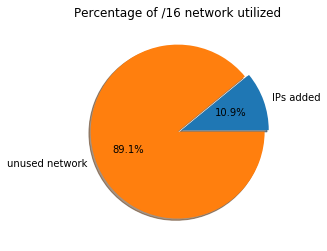

In [21]:
labels = 'IPs added', 'unused network'
fracs = [count_24s, (total_24s_per_16 - count_24s)]
explode = (0.05, 0)
grid = GridSpec(1,1)
plt.subplot(grid[0,0], aspect=1)
plt.pie(fracs, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title("Percentage of /16 network utilized")
plt.savefig("test_figures/IP_pct_pie", dpi=100)

### Convert unix_timestamp to datetime and display new dataframe

In [13]:
df['date'] = pd.to_datetime(df['unix_timestamp'], unit='s')
df

,IP_Address,Subnet_mask,In_use?,unix_timestamp,IP_Network,mask_conversion,num_addresses,date
0,10.128.0.0,22,0,1525670182,10.128.0.0/22,4,1024,2018-05-07 05:16:22
1,10.128.4.0,22,0,1525670192,10.128.4.0/22,4,1024,2018-05-07 05:16:32
2,10.128.8.0,22,0,1525670202,10.128.8.0/22,4,1024,2018-05-07 05:16:42
3,10.128.12.0,22,0,1525670212,10.128.12.0/22,4,1024,2018-05-07 05:16:52
4,10.128.16.0,22,0,1525670222,10.128.16.0/22,4,1024,2018-05-07 05:17:02
5,10.128.128.0,24,0,1525670222,10.128.128.0/24,1,256,2018-05-07 05:17:02
6,10.128.129.0,24,0,1525670222,10.128.129.0/24,1,256,2018-05-07 05:17:02
7,10.128.130.0,24,0,1525670222,10.128.130.0/24,1,256,2018-05-07 05:17:02
8,10.128.131.0,24,0,1525670222,10.128.131.0/24,1,256,2018-05-07 05:17:02
9,10.128.132.0,22,0,1525670222,10.128.132.0/22,4,1024,2018-05-07 05:17:02


### Creating new dataframe for analyzing ip address additions over time

In [14]:
#ip_per_10sec = df[['date', 'num_addresses']]
ip_per_10sec = df[['date', 'mask_conversion']]

### Setting index to date

In [15]:
ip_per_10sec = ip_per_10sec.set_index(['date'])
ip_per_10sec
#df['minute'] = df['date'].apply()

,mask_conversion
date,
2018-05-07 05:16:22,4
2018-05-07 05:16:32,4
2018-05-07 05:16:42,4
2018-05-07 05:16:52,4
2018-05-07 05:17:02,4
2018-05-07 05:17:02,1
2018-05-07 05:17:02,1
2018-05-07 05:17:02,1
2018-05-07 05:17:02,1


### Grouping by Date and summing the number of addresses per date group

In [16]:
#ip_per_10sec.index = ip_per_10sec.index.map(lambda x: x.replace(second=0))
ip_per_10sec = ip_per_10sec.groupby(['date']).sum()

### Number of IP addresses created every 10 seconds

In [17]:
ip_per_10sec

,mask_conversion
date,
2018-05-07 05:16:22,4
2018-05-07 05:16:32,4
2018-05-07 05:16:42,4
2018-05-07 05:16:52,4
2018-05-07 05:17:02,12


### Plot of number of IP addresses added to network at each point in time

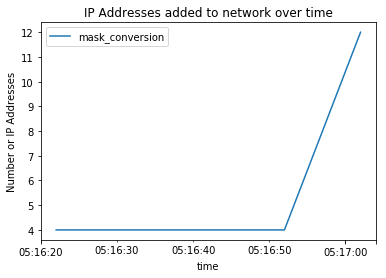

In [20]:
%matplotlib inline
ip_per_10sec.plot()
plt.ylabel("Number or IP Addresses")
plt.xlabel("time")
plt.title("IP Addresses added to network over time")
plt.savefig("test_figures/IP_Addition", dpi=100)

### Adding column to hold cumulative summation of  IP addresses over time

In [22]:
#for i, row in ip_per_10sec.iterrows():
#  ifor_val = something
#  if <condition>:
#    ifor_val = something_else
#  df.set_value(i,'ifor',ifor_val)


#for i in ip_per_10sec.index:
#    if <something>:
#        df.at[i, 'ifor'] = x
#    else:
#        df.at[i, 'ifor'] = y

#ip_per_10sec['ip_cum'] = ip_per_10sec['num_addresses'].cumsum()
ip_per_10sec['ip_cumul'] = ip_per_10sec['mask_conversion'].cumsum()
ip_per_10sec

,mask_conversion,ip_cumul
date,,
2018-05-07 05:16:22,4,4
2018-05-07 05:16:32,4,8
2018-05-07 05:16:42,4,12
2018-05-07 05:16:52,4,16
2018-05-07 05:17:02,12,28


### Unnecessarily creating new dataframe to plot accumulation of ip addresses on network over time

In [23]:
ip = ip_per_10sec.reset_index()
ips_over_time = ip[['date', 'ip_cumul']]

In [24]:
ips_over_time = ips_over_time.set_index(['date'])

In [25]:
ips_over_time

,ip_cumul
date,
2018-05-07 05:16:22,4
2018-05-07 05:16:32,8
2018-05-07 05:16:42,12
2018-05-07 05:16:52,16
2018-05-07 05:17:02,28


### Plot of accumulation of IP adddresses on network over time

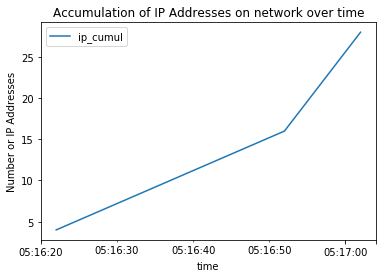

In [26]:
ips_over_time.plot()
plt.ylabel("Number or IP Addresses")
plt.xlabel("time")
plt.title("Accumulation of IP Addresses on network over time")
plt.savefig("test_figures/IP_Accumulation", dpi=100)